In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


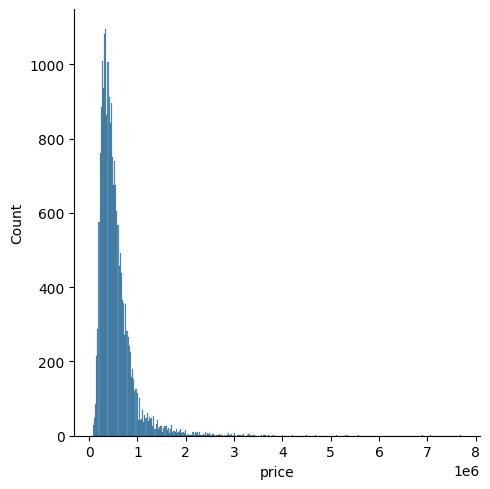

In [5]:
sns.displot(df['price'])

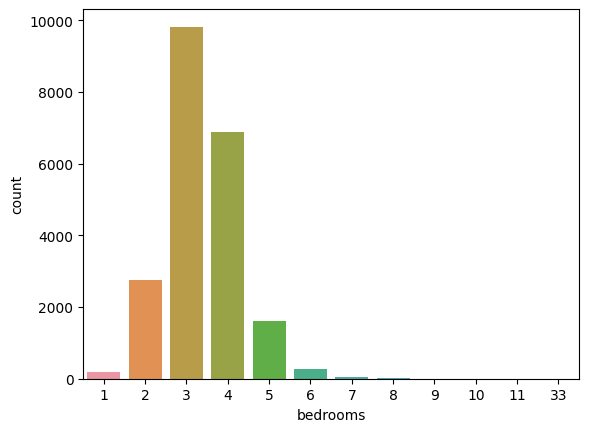

In [9]:
#Don't do sns.countplot(df['bedrooms'])
sns.countplot(x=df['bedrooms'])
plt.show()

In [11]:
df.corr()['price'].sort_values()

ValueError: could not convert string to float: '10/13/2014'

In [12]:
df = df.drop('date', axis='columns')
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='sqft_living'>

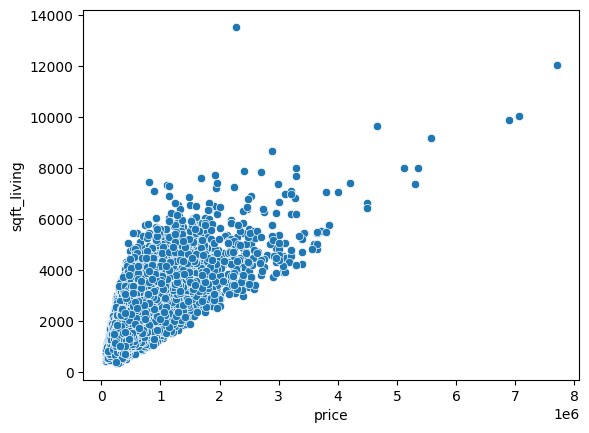

In [13]:
#Comparison between price and sqft
sns.scatterplot(x='price', y='sqft_living', data=df)

<Axes: xlabel='bedrooms', ylabel='price'>

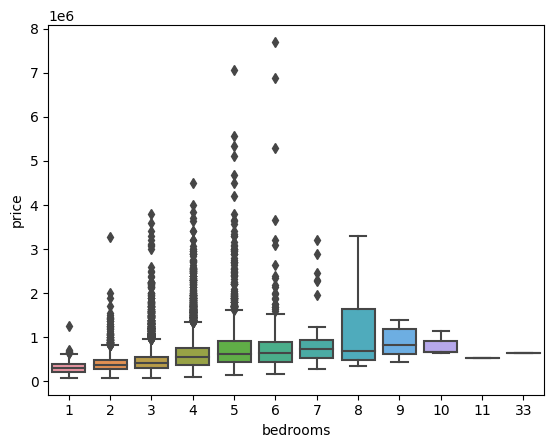

In [14]:
sns.boxplot(x='bedrooms', y='price', data=df)

In [15]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

<Axes: xlabel='price', ylabel='long'>

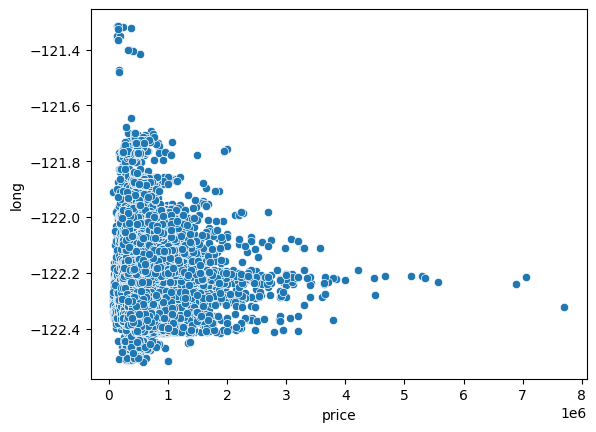

In [16]:
sns.scatterplot(x='price', y='long', data=df)

<Axes: xlabel='price', ylabel='lat'>

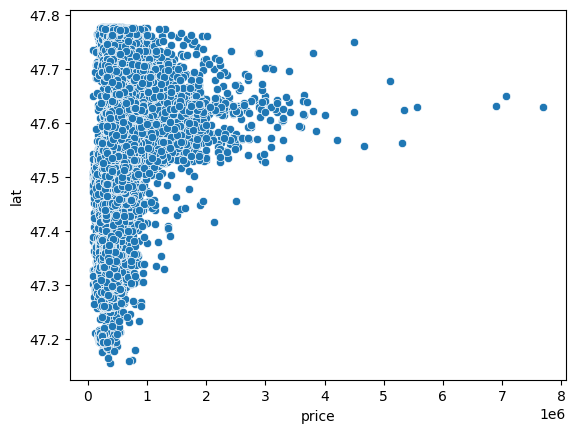

In [17]:
sns.scatterplot(x='price', y='lat', data=df)

<Axes: xlabel='long', ylabel='lat'>

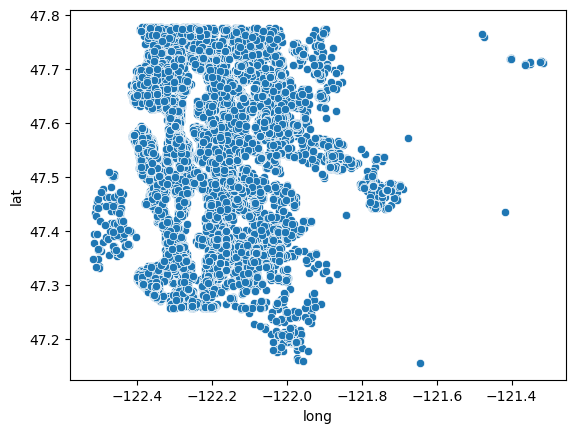

In [18]:
sns.scatterplot(x='long', y='lat', data=df)

<Axes: xlabel='long', ylabel='lat'>

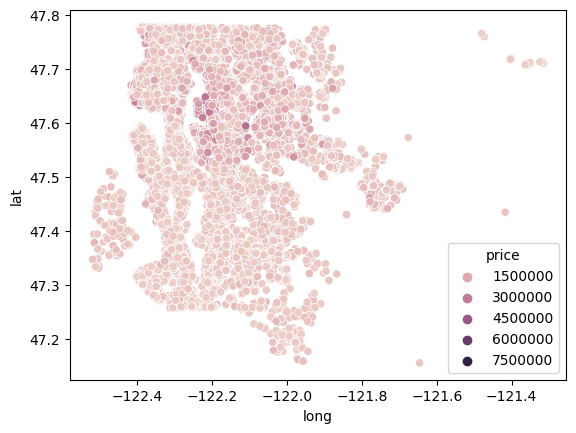

In [19]:
sns.scatterplot(x='long', y='lat', data=df, hue='price')

In [21]:
#Dropping outliers
df.sort_values('price', ascending=False).head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,7060000.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,6890000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750


In [22]:
len(df)
#1% means 215 around houses

21597

In [23]:
non_top_1_perc = df.sort_values('price', ascending=False).iloc[216:]

<Axes: xlabel='long', ylabel='lat'>

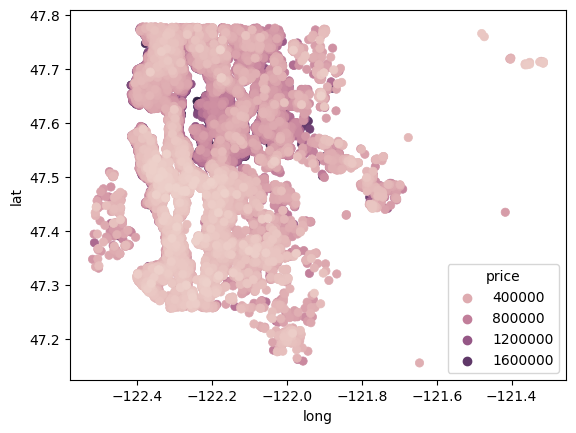

In [24]:
sns.scatterplot(x='long', y='lat', data=non_top_1_perc, edgecolor=None, hue='price')

<Axes: xlabel='long', ylabel='lat'>

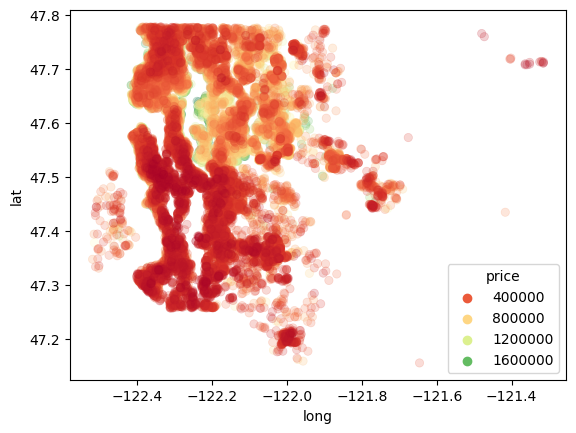

In [25]:
sns.scatterplot(x='long', y='lat', data=non_top_1_perc, edgecolor=None,alpha=0.2, palette='RdYlGn', hue='price')

<Axes: xlabel='waterfront', ylabel='price'>

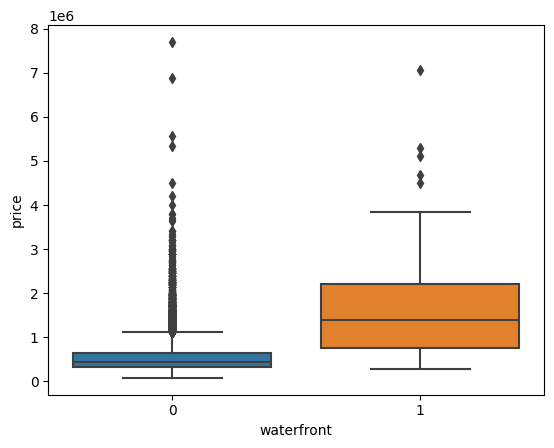

In [27]:
sns.boxplot(x='waterfront', y='price', data=df)

In [29]:
#Dropping useless stuffs
df = pd.read_csv('kc_house_data.csv')
df = df.drop('id', axis=1)

In [30]:
#Date is converted to date-time
df['date'] = pd.to_datetime(df['date'])
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [31]:
def year_extraction(date):
    return date.year

In [32]:
df['year'] = df['date'].apply(lambda date:date.year)
df['month'] = df['date'].apply(lambda date:date.month)

In [33]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<Axes: xlabel='month', ylabel='price'>

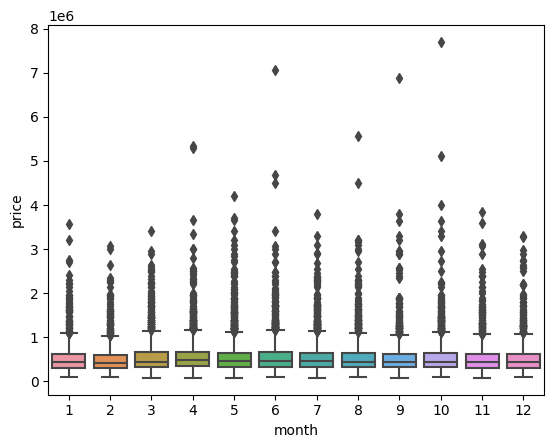

In [34]:
sns.boxplot(x='month', y='price', data=df)

In [35]:
df.groupby('month').mean()['price']

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

<Axes: xlabel='month'>

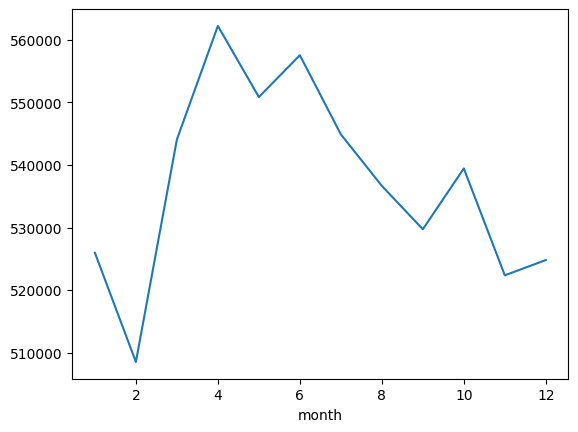

In [36]:
df.groupby('month').mean()['price'].plot()

<Axes: xlabel='year'>

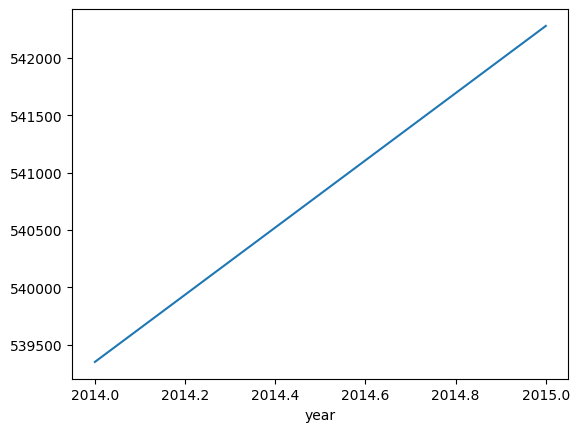

In [37]:
df.groupby('year').mean()['price'].plot()

In [38]:
df = df.drop('date', axis=1)

In [39]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [40]:
df['zipcode'].value_counts()

zipcode
98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: count, Length: 70, dtype: int64

In [41]:
#Zipcode not needed
df = df.drop('zipcode', axis=1)

In [42]:
df['yr_renovated'].value_counts()

yr_renovated
0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

In [43]:
df['sqft_basement'].value_counts()

sqft_basement
0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: count, Length: 306, dtype: int64

In [44]:
#Playing with prices
#.values added to convert price to numbers in case
X = df.drop('price',axis=1).values
y = df['price'].values

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler()

In [49]:
X_train = scaler.fit_transform(X_train)

In [50]:
X_test = scaler.transform(X_test)

In [51]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

In [52]:
X_train.shape

(15117, 19)

In [53]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss='mse')

In [54]:
model.fit(x=X_train, y=y_train, 
          validation_data=(X_test, y_test),
          batch_size=128, epochs=400)

Epoch 1/400
119/119 [==============================] - 4s 11ms/step - loss: 430224605184.0000 - val_loss: 418820161536.0000
Epoch 2/400
119/119 [==============================] - 1s 6ms/step - loss: 427856494592.0000 - val_loss: 410680983552.0000
Epoch 3/400
119/119 [==============================] - 1s 7ms/step - loss: 396373491712.0000 - val_loss: 341025128448.0000
Epoch 4/400
119/119 [==============================] - 1s 10ms/step - loss: 266718429184.0000 - val_loss: 164551852032.0000
Epoch 5/400
119/119 [==============================] - 1s 7ms/step - loss: 120109629440.0000 - val_loss: 96377569280.0000
Epoch 6/400
119/119 [==============================] - 1s 7ms/step - loss: 98639101952.0000 - val_loss: 94439858176.0000
Epoch 7/400
119/119 [==============================] - 1s 7ms/step - loss: 96656236544.0000 - val_loss: 92651847680.0000
Epoch 8/400
119/119 [==============================] - 1s 7ms/step - loss: 94714036224.0000 - val_loss: 90802774016.0000
Epoch 9/400
119/119 [

In [55]:
model.history.history

{'loss': [430224605184.0,
  427856494592.0,
  396373491712.0,
  266718429184.0,
  120109629440.0,
  98639101952.0,
  96656236544.0,
  94714036224.0,
  92640886784.0,
  90214694912.0,
  87429849088.0,
  84635394048.0,
  81601110016.0,
  78413258752.0,
  75097686016.0,
  71752867840.0,
  68294303744.0,
  64935915520.0,
  61799112704.0,
  58895224832.0,
  56365076480.0,
  54214324224.0,
  52677431296.0,
  51319123968.0,
  50234101760.0,
  49396240384.0,
  48581709824.0,
  47916003328.0,
  47276351488.0,
  46720933888.0,
  46303866880.0,
  45780013056.0,
  45389275136.0,
  45075808256.0,
  44668346368.0,
  44325007360.0,
  44061237248.0,
  43796877312.0,
  43496837120.0,
  43246223360.0,
  43010002944.0,
  42780082176.0,
  42681753600.0,
  42482728960.0,
  42236907520.0,
  42102935552.0,
  41918885888.0,
  41799888896.0,
  41612718080.0,
  41463046144.0,
  41393704960.0,
  41203511296.0,
  41077407744.0,
  40969654272.0,
  40828157952.0,
  40729821184.0,
  40604782592.0,
  40490835968.0,
 

In [56]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,4.302246e+11,4.188202e+11
1,4.278565e+11,4.106810e+11
2,3.963735e+11,3.410251e+11
3,2.667184e+11,1.645519e+11
4,1.201096e+11,9.637757e+10
...,...,...
395,3.036149e+10,2.832324e+10
396,3.038943e+10,2.831908e+10
397,3.035942e+10,2.845966e+10
398,3.033994e+10,2.832349e+10


<Axes: >

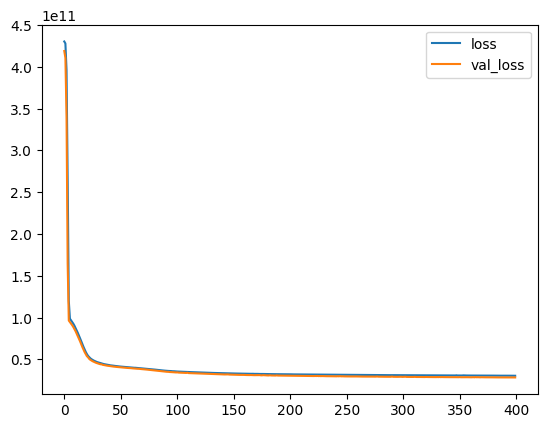

In [57]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [60]:
predictions = model.predict(X_test)

In [61]:
mean_squared_error(y_test, predictions)

28309710541.29282

In [62]:
np.sqrt(mean_squared_error(y_test, predictions))

168254.8975254296

In [63]:
mean_squared_error(y_test, predictions)

28309710541.29282

In [64]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [66]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, predictions)

0.7869434110217399

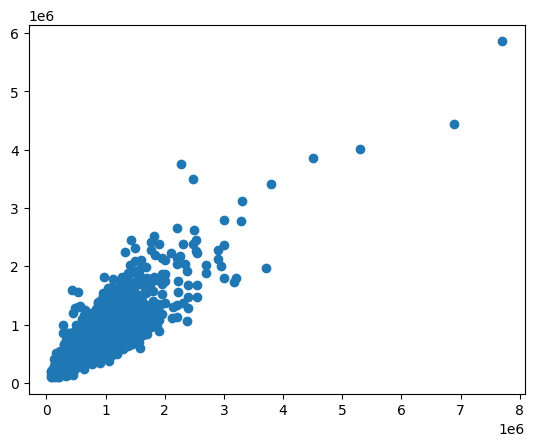

In [67]:
plt.scatter(y_test, predictions)

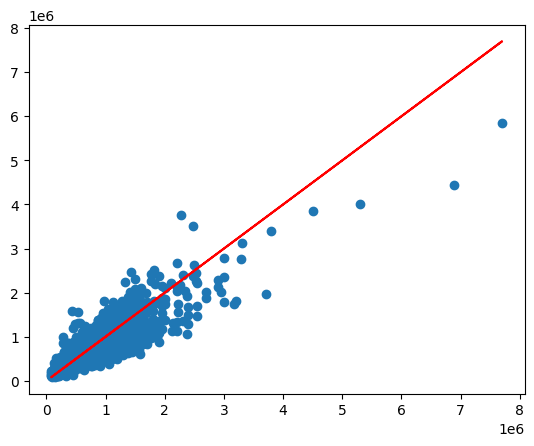

In [68]:
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test,'r')
#plotting y_test against y_test with colour red

In [69]:
#Comparing new house with old house to check whether the house is old or new
single_house = df.drop('price', axis=1).iloc[0]


In [70]:
single_house.values

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  2.01400e+03,  1.00000e+01])

In [71]:
#Reshaping above
single_house.values.reshape(-1, 19)

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [72]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [73]:
model.predict(single_house)

array([[278226.47]], dtype=float32)

In [74]:
df.head(1)
#Old price v/s new price, new price is above
#Slightly overfitting is there

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
